In [1]:
import warnings
warnings.filterwarnings('ignore')
from pprint import pprint

import pandas as pd
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_20newsgroups

## Vectorizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from scipy.sparse import csr_matrix

In [2]:
def splitDataset(dataset,verbose=False):
    '''
    This function can split dataset as 4:1 ratio , and return train,test dataframes.
    '''
    X,y = dataset.iloc[:,:-1],dataset.iloc[:,-1] 
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state = 0 )
    train = pd.concat((X_train,y_train),axis=1)
    train = train.reset_index(drop=True)
    test = pd.concat((X_test,y_test),axis=1)
    test = test.reset_index(drop=True)
    if verbose == True:
        print("Split is succeed.")
        print(f"Train.shape:{train.shape}\tTest.shape:{test.shape}")
    return train,test

# 1. Download Full Dataset

In [3]:
dataset = fetch_20newsgroups(data_home='.',download_if_missing=True)

In [4]:
dataset.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [5]:
np.array(dataset.data).shape

(11314,)

In [6]:
dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

# 2. Download Dataset only 2 Categories: ['sci.space', 'comp.graphics']

In [7]:
categories = ['sci.space','comp.graphics']

In [8]:
spacegraph = fetch_20newsgroups(subset='train',categories=categories,shuffle=True,random_state=7,download_if_missing=True)

In [9]:
spacegraph.target_names

['comp.graphics', 'sci.space']

In [10]:
type(spacegraph)

sklearn.utils.Bunch

In [11]:
np.array(spacegraph.data).shape

(1177,)

In [12]:
df_data = pd.DataFrame(spacegraph.data,columns=['data'])
df_targets = pd.DataFrame(spacegraph.target,columns=['targets'])
df_targets[df_targets.targets == 0] = 'com.graphics'
df_targets[df_targets.targets == 1] = 'sci.space'
dataset_new = pd.concat((df_data,df_targets),axis=1)

In [13]:
dataset_new

,data,targets
0,From: rjs002c@parsec.paradyne.com (Robert Syno...,com.graphics
1,From: eder@hsvaic.boeing.com (Dani Eder)\nSubj...,sci.space
2,From: raynor@cs.scarolina.edu (Harold Brian Ra...,com.graphics
3,From: mbh2@engr.engr.uark.edu (M. Barton Hodge...,com.graphics
4,From: Andrew Rogers <rogers@ial3.jsc.nasa.gov>...,sci.space
...,...,...
1172,From: yamauchi@ces.cwru.edu (Brian Yamauchi)\n...,sci.space
1173,From: clj@ksr.com (Chris Jones)\nSubject: Re: ...,sci.space
1174,From: edm@twisto.compaq.com (Ed McCreary)\nSub...,sci.space
1175,From: schumach@convex.com (Richard A. Schumach...,sci.space


# 3. Split data randomly as 80:20

In [14]:
train,test = splitDataset(dataset_new,verbose=True)

Split is succeed.
Train.shape:(941, 2)	Test.shape:(236, 2)


In [15]:
df_targets.head()

,targets
0,com.graphics
1,sci.space
2,com.graphics
3,com.graphics
4,sci.space


In [16]:
train.tail()

,data,targets
936,From: thester@nyx.cs.du.edu (Uncle Fester)\nSu...,com.graphics
937,From: jbh55289@uxa.cso.uiuc.edu (Josh Hopkins)...,sci.space
938,From: henry@zoo.toronto.edu (Henry Spencer)\nS...,sci.space
939,From: dante@shakala.com (Charlie Prael)\nSubje...,sci.space
940,From: mrf4276@egbsun12.NoSubdomain.NoDomain (M...,sci.space


In [17]:
test.tail()

,data,targets
231,From: dgempey@ucscb.UCSC.EDU (David Gordon Emp...,sci.space
232,From: dgf1@ellis.uchicago.edu (David Farley)\n...,com.graphics
233,From: disser@engin.umich.edu (David Disser)\nS...,com.graphics
234,From: sysmgr@king.eng.umd.edu (Doug Mohney)\nS...,sci.space
235,From: hwstock@snll-arpagw.llnl.gov (stockman h...,com.graphics


# 4. Vectorization on Datasets

In [18]:
def createVectorizedDataset(dataset):
    '''
    Inputs : Pandas dataframe which has articles and targets(groups)
    Return: vocabs all of articles and vectorized dataset
    '''
    X,y = dataset.iloc[:,0],dataset.iloc[:,1] # veri kümesini target ve postlar olarak böler 
    frequencyCounter = CountVectorizer().fit(X) # sayacı verilen veri kümesi için aktifleştirir
    freqs_X = frequencyCounter.transform(X).toarray() # sayaca göre verilen veri kümesini işler 
    vocab = frequencyCounter.vocabulary_ # sözlügü alır 
    cols = list(vocab.keys()) # sözlükteki kelimeleri alır 
    df_freqs_X = pd.DataFrame(freqs_X,columns=cols) # sözlükteki kelimeleri feature adı olark kullanarak df olusturur
    vectorized_dataset = pd.concat((df_freqs_X,y),axis=1) # target'lar ile olusturulan önceki frame'i eşleştirir.
    
    return frequencyCounter,vectorized_dataset

In [19]:
frequencyCounter, vectorized_train_dataset = createVectorizedDataset(train)

In [20]:
vectorized_train_dataset

,from,ab,nova,cc,purdue,edu,allen,subject,re,tiff,...,befuddled,genuinely,gigolos,giraffes,somethings,misrepresented,transfers,matthew_feulner,qmlink,targets
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,com.graphics
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,sci.space
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,sci.space
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,sci.space
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,sci.space
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,com.graphics
937,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,sci.space
938,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,sci.space
939,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,sci.space


In [21]:
def createVectorizedTestSet(test_dataset,frequencyCounter):
    X,y = test_dataset.iloc[:,0],test_dataset.iloc[:,1]
    freqs_X = frequencyCounter.transform(X).toarray()
    vocab = frequencyCounter.vocabulary_
    cols = list(vocab.keys())
    df_freqs_X = pd.DataFrame(freqs_X,columns=cols) # sözlükteki kelimeleri feature adı olark kullanarak df olusturur
    vectorized_dataset = pd.concat((df_freqs_X,y),axis=1) # target'lar ile olusturulan önceki frame'i eşleştirir.
    
    return vectorized_dataset

In [22]:
vectorized_test_dataset = createVectorizedTestSet(test,frequencyCounter)

In [23]:
vectorized_test_dataset

,from,ab,nova,cc,purdue,edu,allen,subject,re,tiff,...,befuddled,genuinely,gigolos,giraffes,somethings,misrepresented,transfers,matthew_feulner,qmlink,targets
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,sci.space
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,sci.space
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,com.graphics
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,com.graphics
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,sci.space
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,sci.space
232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,com.graphics
233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,com.graphics
234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,sci.space


# 5. Task(A) Decision Tree from Scratch

In [24]:
class decisionTreeClassifier_scratch:
    def __init__(self,depth=0,min_sample=2,max_depth=5,method='information_gain',verbose=False):
        self.depth = depth
        self.min_sample = min_sample
        self.max_depth = max_depth
        self.method = method 
        print(f'Decision Tree Classifier:[ Depth={depth},Min_sample_size={min_sample},Max_depth={max_depth},Method={method} ] ')
        
    def isLeafNode(self,data,verbose=False):
        '''
        Input : data is equals to a 2D numpy array which contains all values.
        Return a boolean result which if tree is pure(length of tree is equal to 1) True so it's leaf node, else False.
        '''
        unique_labels = np.unique(data[:,-1])
        if len(unique_labels) == 1:
            if verbose:
                print(f"TRUE : Tree is NOT dividable, it is leaf node it's mean is Pure.")
            return True
        else:
            if verbose:
                print(f"FALSE : Tree is dividable ! It's NOT Pure.")
            return False

    def classify_as_majority(self,data):
        '''
        Inputs: data, is a 2D numpy array which contains all values
        Outputs: Return 'label' is represents class which has majority.
        '''
        values = data[:,-1]
        names,counts = np.unique(values,return_counts=True)
        max_index = counts.argmax()
        label = names[max_index]
        return label

    def findPotentialSplits(self,data,verbose=False):
        '''
        Inputs : data -> It's a 2D numpy array which contains all dataframe values.
        Output: return a dict which has potential splits [column_name:potential_splits(unique values)]
        '''
        potential_splits = {}
        for col_index in range(data.shape[1]-1):
            potential_splits[col_index] = []
            vals = data[:,col_index]
            unique_vals = np.unique(vals) # find unique values
            for index in range(1,len(unique_vals)):
                current_val = unique_vals[index]
                previous_val = unique_vals[index-1]
                potential_split = (current_val + previous_val) / 2
              
                potential_splits[col_index].append(potential_split)
        if verbose:
            print("Potential Splits:\n",potential_splits)
        return potential_splits

    def splitData(self,data,col,val,verbose=False):
        '''
        Inputs: data -> is a 2D Numpy array
                col -> Column index to split 
                val -> condition value to split
        Outputs: 
                return left subtree and right sub tree
                If condition is true, then return left sub tree else return right sub tree
        '''
        splitting_col = data[:,col]
        left,right=data[ splitting_col <= val ], data[splitting_col > val]
        if verbose:
            print(f"Case of COLUMN: {col} and CONDITION= {val} -> Split data is succeed !")
        return left,right

    def calculateEntropy(self,data,verbose=False):
        '''
        Inputs : data -> is a 2D numpy array which contains only label values.
        Return entropy 
        '''
        labels = data[:,-1]
        unique_labels,counts = np.unique(labels,return_counts=True) # Counts-> [profitable_counts(yes) , unprofitable_counts(no)]
        total = counts.sum()
        probs = counts / total
        entropy = (probs*np.log2(probs)).sum()
        if verbose:
            print(f"Total Count:{total}\nProbabilities\nProfitable:{probs[0]}\tUnprofitable:{probs[1]}\nEntropy:{-entropy}")
        return -entropy

    def calculateAllEntropy(self,left,right,verbose=False):
        '''
        Inputs: left -> is a 2D numpy array which has left sub_tree values
                right -> is a 2D numpy array which has right sub_tree values
        Return information by being probabilities
        '''
        total = len(left) + len(right)
        prob_left = len(left) / total
        prob_right = len(right) / total
        information = prob_left * self.calculateEntropy(left) + prob_right * self.calculateEntropy(right)

        if verbose:
            print(f"PROBABILITIES\nLeft:{prob_left}\tRight:{prob_right}\nInformation:{information}")
        return information


    def findBestSplit(self,data,potential_splits,method='information_gain',verbose=False):
        '''
        Inputs: data -> is a 2D numpy array
                potential_splits -> a dict object which has potential column indices and values.
                method -> Options: 'information_gain' or 'gini'. If method is not define, standart method is information gain. If method is equals to gini, tree splitted by calculating gini score.
        Returns : best column indice and best  value 
        '''
        
        information = np.inf
        gini_score = np.inf
        best_col = ''
        best_val = ''
        for col in potential_splits:
            for val in potential_splits[col]:
                left,right = self.splitData(data,col,val,False)
                if method == 'information_gain':
                    current_entropy = self.calculateAllEntropy(left,right,False)

                    if current_entropy <= information:
                        information = current_entropy
                        best_col = col
                        best_val = val
                    if verbose:
                        print(f"\n{col}.WORD = {COLUMNS[col]}\tInformation:{information}\tBest Column:{best_col}\tBest Value:{best_val}\n")
                elif method == 'gini':
                    current_gini = self.calculateAllGini(left,right,False)

                    if current_gini <= gini_score:
                        gini_score = current_gini
                        best_col = col
                        best_val = val 
                    if verbose:
                        print(f"\nGini Score:{gini_score}\tBest Column:{best_col}\tBest Value:{best_val}\n")
        return best_col, best_val


    def fit(self,dataset,verbose=False,show=False):
        '''
        This function create decision tree.
        Dataset -> is a pandas dataframe
        Depth -> initial depth of decision tree
        min-sample -> minimum sample size of dataset 

        Return sub_tree or 
        '''
        # Be sure dataset is a 2D numpy array because of other functions need to a 2D numpy array to input 
        if self.depth == 0:
            global COLUMNS
            COLUMNS = dataset.columns
            data = dataset.values
        else:
            data = dataset

        # base case 
        if self.isLeafNode(data) or len(data) <= self.min_sample or self.depth == self.max_depth:
            return self.classify_as_majority(data)

        ## recursive part
        else:
            self.depth += 1

            #helper functions 
            potential_splits = self.findPotentialSplits(data,False)
            col,val = self.findBestSplit(data,potential_splits,method=self.method,verbose=verbose)
            left,right = self.splitData(data,col,val,False)

            # check one of trees are done ? 
            if len(left)==0 or len(right) == 0:
                return self.classify_as_majority(data)

            question = f"{COLUMNS[col]} <= {val}"
            sub_tree = {question:[]}

            # find answers 
            yes = self.fit(left)
            no = self.fit(right)

            if yes == no:
                sub_tree = yes
            else:
                sub_tree[question].append(yes)
                sub_tree[question].append(no)
            if show:
                pprint(sub_tree,width=30)
            return sub_tree
    def showTree(tree):
        print(tree)

    def calculateGiniScore(self,data,verbose=False):
        '''
        Inputs : data -> is a 2D numpy array which contains only label values.
        Return: gini_score 
        '''
        labels = data[:,-1]
        unique_labels,counts = np.unique(labels,return_counts=True) # Counts-> [profitable_counts(yes) , unprofitable_counts(no)]
        total = counts.sum()
        probs = counts / total
        gini_score = (probs**2).sum()

        if verbose:
            print(f"Total Count:{total}\nProbabilities\nProfitable:{probs[0]}\tUnprofitable:{probs[1]}\n Gini Score:{1-gini_score}")
        return (1-gini_score)


    def calculateAllGini(self,left,right,verbose=False):
        '''
        Inputs: left -> is a 2D numpy array which has left sub_tree values
                right -> is a 2D numpy array which has right sub_tree values
        Return information by being probabilities
        '''
        total = len(left) + len(right)
        prob_left = len(left) / total
        prob_right = len(right) / total
        final_gini_score = prob_left * self.calculateGiniScore(left) + prob_right * self.calculateGiniScore(right)

        if verbose:
            print(f"PROBABILITIES\nLeft:{prob_left}\tRight:{prob_right}\nGini Score(weighted):{final_gini_score}")
        return final_gini_score

    def predict(self,sample,tree):
        '''
        Inputs:
        sample is a pandas series from a test dataset frame
        tree is our decision tree structure
        Return:
        prediction.
        '''
        question = list(tree.keys())[0] # get question 
        feature_name, question_type, value = question.split()
        

        # find answer
        if sample[feature_name] <= float(value):
            answer= tree[question][0]
        else:
            answer = tree[question][1]

        # check answer is finite or not 
        if isinstance(answer,dict):
            sub_tree = answer
            return self.predict(sample,sub_tree)
        else: 
            return answer

    def accuracy_calc(self,dataset,tree,verbose=False):
        predictions = [self.predict(dataset.iloc[row],tree) for row in range(len(dataset))]
        col = dataset.columns[-1]
        true_counter = 0 
        for i in range(len(predictions)):
            if dataset[col].iloc[i] == predictions[i]:
                true_counter +=1
        total_count = len(predictions)
        accuracy = true_counter / total_count

        if verbose:
            print(f"False Prediction : {total_count- true_counter}\nTrue Prediction : {true_counter}\nAccuracy:{accuracy}")
        return accuracy,predictions

In [25]:
vectorized_train_dataset.shape

(941, 21018)

* <b>Observation:</b> When I examined the dataset, I saw that if the entropy calculation was done 1 time in the dataset, even for features only, 941x21018 times will be calculated. I decided to shrink the data set because doing so many operations is a time and memory consuming operation. So I apply PCA as dimensionality reduction method 

In [26]:
from sklearn.decomposition import PCA

In [27]:
def reduceDimension(dataset,n_dim=2,verbose=False):
    '''
    dataset: is a dataframe 
    n_dim : is component count
    return : a dataframe which is reduced dimension.
    '''
    X, y =dataset.iloc[:,:-1],dataset.iloc[:,-1]
    pca = PCA(n_components=n_dim)
    pca = pca.fit(X)
    X_reduced = pca.transform(X)
    cols = []
    for i in range(1,n_dim+1):
        col_name = f'component_{i}'
        cols.append(col_name)
        
    df_X_reduced = pd.DataFrame(data=X_reduced,columns=cols)
    dataset_reduced = pd.concat((df_X_reduced,y),axis=1)
    if verbose:
        print(f"Dataset dimension is reduced {dataset.shape} to {dataset_reduced.shape}")
    return dataset_reduced,pca

def reduceDimensionTest(dataset,pca,verbose=False):
    X, y =dataset.iloc[:,:-1],dataset.iloc[:,-1]
    X_reduced = pca.transform(X)
    cols = []
    n_dim = pca.n_components
    for i in range(1,n_dim+1):
        col_name = f'component_{i}'
        cols.append(col_name)
    df_X_reduced = pd.DataFrame(data=X_reduced,columns=cols)
    dataset_final = pd.concat((df_X_reduced,y),axis=1)
    if verbose:
        print("Test dataset dimension reduced..")
    return dataset_final

In [28]:
reduced_dataset_train,pca = reduceDimension(vectorized_train_dataset,n_dim=20,verbose=True)

Dataset dimension is reduced (941, 21018) to (941, 21)


In [29]:
reduced_dataset_train

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_12,component_13,component_14,component_15,component_16,component_17,component_18,component_19,component_20,targets
0,-4.804692,0.655146,-0.637104,0.322642,0.458175,0.395769,-1.329251,-0.189684,-1.559974,0.268083,...,-0.247005,-0.775091,-0.005031,0.159734,-0.016712,0.922246,-0.784636,-0.788283,0.813669,com.graphics
1,32.508961,-4.818923,-12.655746,8.524267,7.190348,-0.919708,-12.300725,0.189674,1.596075,2.340627,...,0.057985,-7.393937,-3.395569,-6.037789,2.877579,-1.274769,1.939125,-1.710854,2.780762,sci.space
2,-14.738381,1.359648,3.157400,-1.706097,-1.680463,1.287574,0.491943,-0.194603,-0.064566,-0.026572,...,0.635437,-0.136826,-0.924810,0.082110,-0.048880,0.297784,0.010160,-0.658371,0.432137,sci.space
3,-13.813676,1.113791,2.024312,-0.003376,-1.168948,1.153732,1.278054,-0.160173,0.420286,-0.552969,...,-0.449908,-0.116246,0.002866,0.315639,0.361656,-0.673808,-0.071251,0.191163,-0.039716,sci.space
4,-11.431483,2.480929,1.135420,-0.312108,1.419412,0.183417,1.958078,-0.058216,-0.547871,-1.428161,...,0.598084,-2.793857,1.972665,0.455658,2.314596,0.567359,0.458504,-1.156641,-0.512124,sci.space
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,0.500386,0.694172,-0.177296,1.378344,1.854064,0.474565,-3.135635,0.055336,-0.212984,-1.558902,...,-0.999217,-1.991996,-0.987590,-2.348517,1.376262,0.906124,0.565319,-1.003580,-0.342833,com.graphics
937,-12.519739,1.477079,2.151673,-1.088734,-0.951618,0.699084,1.872305,0.053075,-0.452656,-1.470688,...,-0.863573,-1.089230,0.356061,-0.394319,0.844994,0.252884,-0.131099,0.351833,-0.435999,sci.space
938,-3.832835,0.528515,-1.932432,1.529224,1.014388,0.579007,-1.407615,-0.162305,-0.884084,-1.412087,...,-0.529130,1.074751,0.205495,-0.424564,-1.267919,-1.031469,-1.290477,-0.046270,-0.043183,sci.space
939,-9.376905,1.621693,1.826002,-0.337854,-0.789063,-0.170166,2.155918,-0.351460,0.036146,0.669826,...,0.507673,1.631029,-0.132926,0.546836,-1.644492,0.345031,-0.621796,-0.353906,0.500747,sci.space


In [30]:
reduced_dataset_test = reduceDimensionTest(vectorized_test_dataset,pca,True)
reduced_dataset_test

Test dataset dimension reduced..


,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_12,component_13,component_14,component_15,component_16,component_17,component_18,component_19,component_20,targets
0,3.990101,-2.001193,-3.201715,1.142542,0.397906,-0.992429,-0.078398,-0.263660,-0.125646,1.916759,...,-1.474979,1.143531,-1.569188,0.003713,-0.236336,-0.882347,-1.393167,-1.277481,0.905430,sci.space
1,-0.188367,-0.700176,0.782926,0.150606,-0.876875,-1.015550,1.485813,-0.331536,-0.242120,0.914967,...,0.412120,2.095681,-2.089352,-0.042161,-1.653601,-0.379989,0.695980,1.149187,0.657055,sci.space
2,-4.790873,0.745153,3.461980,-0.905651,1.159587,0.184815,3.722571,-0.310900,0.120875,0.191599,...,0.093869,-1.988953,1.688323,0.270674,1.650984,-0.726975,0.172917,-0.234168,0.377506,com.graphics
3,-11.791631,1.071669,3.718470,0.820142,-1.119342,1.786714,1.132845,-0.279965,0.550651,0.893613,...,0.135926,0.530439,-1.498973,-0.110775,0.697844,-0.031117,0.451768,0.006710,0.299515,com.graphics
4,-2.368156,-2.261535,-3.768761,1.880726,1.804253,3.298307,-1.656941,0.044199,-1.331373,-2.093680,...,1.098687,-2.619589,0.461519,1.303514,2.086667,-1.211834,-0.736826,1.603241,0.099979,sci.space
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,-9.296422,0.904482,1.692869,1.766849,-0.364190,1.062124,-0.105251,-0.102170,0.893892,-1.305049,...,-0.108731,0.403620,-0.625704,-1.451060,-0.624337,-1.240169,0.212440,1.178774,0.086212,sci.space
232,-6.087706,1.407650,0.571070,0.431540,0.872067,0.674991,1.167174,0.055128,-0.166019,-1.229242,...,-1.478225,1.314292,0.905758,-0.052536,0.870599,-0.371487,-1.135439,0.465002,-0.644115,com.graphics
233,-12.601840,1.090942,2.268788,0.536026,-1.095988,1.625827,-0.455155,-0.056956,0.030546,-0.119943,...,-0.067493,0.599369,-0.836743,-0.300216,-0.703483,-0.419561,0.069928,-0.102840,0.377526,com.graphics
234,-11.284233,1.199349,2.809254,0.168541,-0.219870,0.771351,2.168447,0.041057,-0.520088,-2.399319,...,-0.411753,0.680404,1.683011,-1.009686,-0.458481,-1.978907,-0.426224,0.835369,-0.467349,sci.space


In [31]:
import time 
def createTrees(dataset,max_depth=3,verbose=False,trainMode=False):
    trees = {}
    for depth in range(max_depth):
        baslangic = time.time()
        clf = decisionTreeClassifier_scratch(max_depth=depth,verbose=True)
        my_tree = clf.fit(dataset,show=verbose,verbose=verbose)
        tree_id = f'depth={depth}'
        trees[tree_id] = my_tree
        bitis = time.time()
        passed_time = bitis-baslangic
        print(f"TREE ID : {tree_id} \t MyTree: {my_tree} \t Time: {np.round(passed_time,3)} second")
        print("\n***\n")
    return trees

In [32]:
trees = createTrees(reduced_dataset_train,max_depth=10,verbose=False)

Decision Tree Classifier:[ Depth=0,Min_sample_size=2,Max_depth=0,Method=information_gain ] 
TREE ID : depth=0 	 MyTree: com.graphics 	 Time: 0.003 second

***

Decision Tree Classifier:[ Depth=0,Min_sample_size=2,Max_depth=1,Method=information_gain ] 
TREE ID : depth=1 	 MyTree: {'component_3 <= 1.6873807831028844': ['sci.space', 'com.graphics']} 	 Time: 9.563 second

***

Decision Tree Classifier:[ Depth=0,Min_sample_size=2,Max_depth=2,Method=information_gain ] 
TREE ID : depth=2 	 MyTree: {'component_3 <= 1.6873807831028844': ['sci.space', 'com.graphics']} 	 Time: 14.549 second

***

Decision Tree Classifier:[ Depth=0,Min_sample_size=2,Max_depth=3,Method=information_gain ] 
TREE ID : depth=3 	 MyTree: {'component_3 <= 1.6873807831028844': ['sci.space', 'com.graphics']} 	 Time: 13.015 second

***

Decision Tree Classifier:[ Depth=0,Min_sample_size=2,Max_depth=4,Method=information_gain ] 
TREE ID : depth=4 	 MyTree: {'component_3 <= 1.6873807831028844': ['sci.space', 'com.graphics']} 	

In [33]:
pprint(trees[list(trees.keys())[-1]],width=250)

{'component_3 <= 1.6873807831028844': [{'component_17 <= -0.5132844031614945': [{'component_10 <= -1.0834005119047188': [{'component_13 <= -2.269621717076781': [{'component_5 <= 1.7283057528695902': ['sci.space',
                                                                                                                                                                                                        {'component_19 <= 0.29147384200296184': ['sci.space',
                                                                                                                                                                                                                                                 'com.graphics']}]},
                                                                                                                                                                 'sci.space']},
                                                                                                

In [34]:
def resultsDetails(dataset,trees_dict,verbose=False):
    results = {}
    baslangic = time.time()
    for i in range(len(trees_dict)):
        depth = list(trees_dict.keys())[i]
        print("depth--:",depth)
        tree = list(trees_dict.values())[i]
        if i != 0:
            clf = decisionTreeClassifier_scratch(max_depth=depth)
            acc,_ = clf.accuracy_calc(dataset,tree,verbose=False)
        else:
            vals,counts = np.unique(np.array(dataset.iloc[:,-1] == tree),return_counts=True)
            acc = counts[1] / counts.sum() 
        results[depth] = acc
    bitis = time.time()
    if verbose:
        print(f"RESULTS: {results} \t Passed Time: {np.round(bitis-baslangic,3)}")
    return results 

In [35]:
results_test = resultsDetails(reduced_dataset_test,trees,verbose=True)

depth--: depth=0
depth--: depth=1
Decision Tree Classifier:[ Depth=0,Min_sample_size=2,Max_depth=depth=1,Method=information_gain ] 
depth--: depth=2
Decision Tree Classifier:[ Depth=0,Min_sample_size=2,Max_depth=depth=2,Method=information_gain ] 
depth--: depth=3
Decision Tree Classifier:[ Depth=0,Min_sample_size=2,Max_depth=depth=3,Method=information_gain ] 
depth--: depth=4
Decision Tree Classifier:[ Depth=0,Min_sample_size=2,Max_depth=depth=4,Method=information_gain ] 
depth--: depth=5
Decision Tree Classifier:[ Depth=0,Min_sample_size=2,Max_depth=depth=5,Method=information_gain ] 
depth--: depth=6
Decision Tree Classifier:[ Depth=0,Min_sample_size=2,Max_depth=depth=6,Method=information_gain ] 
depth--: depth=7
Decision Tree Classifier:[ Depth=0,Min_sample_size=2,Max_depth=depth=7,Method=information_gain ] 
depth--: depth=8
Decision Tree Classifier:[ Depth=0,Min_sample_size=2,Max_depth=depth=8,Method=information_gain ] 
depth--: depth=9
Decision Tree Classifier:[ Depth=0,Min_sample_

In [36]:
results_train = resultsDetails(reduced_dataset_train,trees,verbose=True)

depth--: depth=0
depth--: depth=1
Decision Tree Classifier:[ Depth=0,Min_sample_size=2,Max_depth=depth=1,Method=information_gain ] 
depth--: depth=2
Decision Tree Classifier:[ Depth=0,Min_sample_size=2,Max_depth=depth=2,Method=information_gain ] 
depth--: depth=3
Decision Tree Classifier:[ Depth=0,Min_sample_size=2,Max_depth=depth=3,Method=information_gain ] 
depth--: depth=4
Decision Tree Classifier:[ Depth=0,Min_sample_size=2,Max_depth=depth=4,Method=information_gain ] 
depth--: depth=5
Decision Tree Classifier:[ Depth=0,Min_sample_size=2,Max_depth=depth=5,Method=information_gain ] 
depth--: depth=6
Decision Tree Classifier:[ Depth=0,Min_sample_size=2,Max_depth=depth=6,Method=information_gain ] 
depth--: depth=7
Decision Tree Classifier:[ Depth=0,Min_sample_size=2,Max_depth=depth=7,Method=information_gain ] 
depth--: depth=8
Decision Tree Classifier:[ Depth=0,Min_sample_size=2,Max_depth=depth=8,Method=information_gain ] 
depth--: depth=9
Decision Tree Classifier:[ Depth=0,Min_sample_

In [37]:
import matplotlib.pyplot as plt
def preparePlotDatas(results_dict):
    depths, accs = list(),list()
    for depth_info in results_dict.keys():
        acc = results_dict[depth_info]
        depth = depth_info.split('=')[1]
        depths.append(depth)
        accs.append(acc)
    return depths,accs

In [38]:
test_plot_depth,test_plot_acc = preparePlotDatas(results_test)

In [39]:
train_plot_depth,train_plot_acc = preparePlotDatas(results_train)

Text(0, 0.5, 'Accuracy')

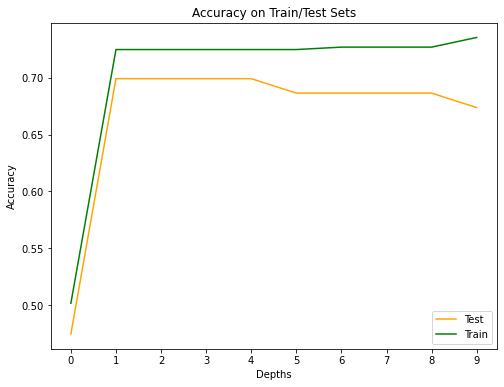

In [40]:
plt.figure(figsize=(8,6))
plt.plot(test_plot_depth,test_plot_acc,color='orange',label='Test')
plt.plot(train_plot_depth,train_plot_acc,color='green',label='Train')
plt.legend(loc='best')
plt.title('Accuracy on Train/Test Sets')
plt.xlabel('Depths')
plt.ylabel('Accuracy')

In [41]:
table = pd.DataFrame({'Depths':[],'Train Accuracy':[],'Test Accuracy':[]})
for i in range(len(test_plot_depth)):
    depth = test_plot_depth[i]
    train_acc = train_plot_acc[i]
    test_acc = test_plot_acc[i]
    table = table.append({'Depths':depth,'Train Accuracy':train_acc,'Test Accuracy':test_acc},ignore_index=True)

In [42]:
table

,Depths,Train Accuracy,Test Accuracy
0,0,0.501594,0.474576
1,1,0.724761,0.699153
2,2,0.724761,0.699153
3,3,0.724761,0.699153
4,4,0.724761,0.699153
5,5,0.724761,0.686441
6,6,0.726886,0.686441
7,7,0.726886,0.686441
8,8,0.726886,0.686441
9,9,0.735388,0.673729


# Task(B) DecisionTreeClassifier in Scikit-Learn

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
X_train,y_train,X_test,y_test = vectorized_train_dataset.iloc[:,:-1],vectorized_train_dataset.iloc[:,-1],vectorized_test_dataset.iloc[:,:-1],vectorized_test_dataset.iloc[:,-1]

In [45]:
clf_dd = DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=10)

In [46]:
clf_dd.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)

In [47]:
clf_dd.score(X_test,y_test)

0.9152542372881356

In [48]:
clf_dd.score(X_train,y_train)

0.944739638682253

In [49]:
from sklearn import metrics

In [50]:
print(metrics.classification_report(clf_dd.predict(X_test),y_test))

              precision    recall  f1-score   support

com.graphics       0.98      0.86      0.92       128
   sci.space       0.85      0.98      0.91       108

    accuracy                           0.92       236
   macro avg       0.92      0.92      0.92       236
weighted avg       0.92      0.92      0.92       236



# Results

My decision tree classifier results are worst than decision tree in scikit-learn. Because i use dimensionality reduction to better calculation speed. If i only use whole dataset my computation time are longer. And probably my new representation on dataset are worst than original one. So My accuracy is lower. In my classifier after epoch 4, my model is going to overfit. In the beginning model is learn quickly but not enough to calculate better.